In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

In [2]:
x = np.linspace( 0.0001, 2*np.pi, 100 )
y = 1/x * np.sin(5*x)

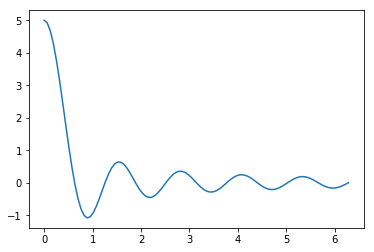

In [3]:
plt.plot(x, y)
plt.show()

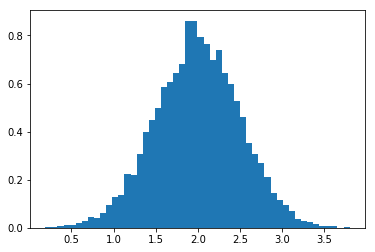

In [6]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu, sigma, 10000)

# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)

# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)

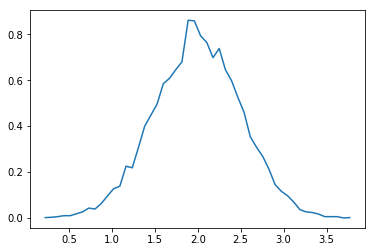

In [7]:
plt.plot(.5 * (bins[1:] + bins[:-1]), n)
plt.show()

In [8]:
# DFFT
def f(t, harmonics):
    v = 0
    for i, harmonic in enumerate(harmonics):
        v += harmonic * np.sin(i * 2.0 * np.pi * t)
    return v

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 30.0

t = np.linspace(0.0, N*T, N)
y = f(t, (0, 1.0, 0.2, 0.8, 0.1, 0.2, 0.9))

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

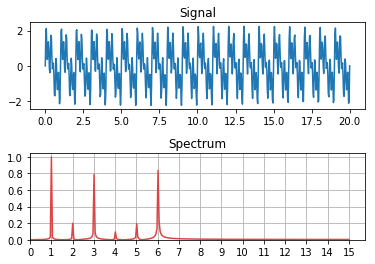

In [11]:
fig, axarr = plt.subplots(2)
fig.subplots_adjust(hspace=0.5)

axarr[0].set_title('Signal')
axarr[0].plot(t, y)

axarr[1].set_title('Spectrum')
axarr[1].plot(xf, 2.0/N * np.abs(yf[:N//2]), color='#dd4444')
axarr[1].grid(True)
axarr[1].set_xlim(left=0)
axarr[1].set_ylim(bottom=0)
axarr[1].set_xticks(np.arange(*axarr[1].get_xlim(), step=1))
axarr[1].set_yticks(np.arange(*axarr[1].get_ylim(), step=0.2))

plt.show()

''